In [14]:
#import required packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.stats.diagnostic
#import numpy as np

In [15]:
#read the data
df = pd.read_csv("test.csv")
#check the dtypes
df.dtypes

Date          object
300750.SZ    float64
002812.SZ    float64
300115.SZ    float64
002850.SZ    float64
002463.SZ    float64
002384.SZ    float64
dtype: object

In [16]:
df.head()

,Date,300750.SZ,002812.SZ,300115.SZ,002850.SZ,002463.SZ,002384.SZ
0,2018/6/11,36.075409,29.310089,13.804667,34.509933,4.140113,17.335423
1,2018/6/12,39.682949,28.779934,13.932762,33.809875,4.130279,17.547398
2,2018/6/13,43.649250,28.174040,13.400678,32.182976,4.081109,17.090328
3,2018/6/14,48.014175,28.605158,13.400678,31.433619,4.090943,16.858482
4,2018/6/15,52.817585,28.873148,12.839030,29.313725,4.041773,15.997343


In [17]:
#convert the form of the Date col
df['Date'] = pd.to_datetime(df.Date, format = '%Y/%m/%d')
data = df.drop(['Date'], axis=1)
data.index = df.Date
data

,300750.SZ,002812.SZ,300115.SZ,002850.SZ,002463.SZ,002384.SZ
Date,,,,,,
2018-06-11,36.075409,29.310089,13.804667,34.509933,4.140113,17.335423
2018-06-12,39.682949,28.779934,13.932762,33.809875,4.130279,17.547398
2018-06-13,43.649250,28.174040,13.400678,32.182976,4.081109,17.090328
2018-06-14,48.014175,28.605158,13.400678,31.433619,4.090943,16.858482
2018-06-15,52.817585,28.873148,12.839030,29.313725,4.041773,15.997343
...,...,...,...,...,...,...
2021-03-15,312.299988,118.320000,21.150000,61.799999,16.719999,18.620001
2021-03-16,323.000000,119.790001,21.180000,62.430000,16.639999,18.969999
2021-03-17,333.000000,122.800003,21.129999,65.599998,16.799999,19.080000


In [18]:
data.dtypes

300750.SZ    float64
002812.SZ    float64
300115.SZ    float64
002850.SZ    float64
002463.SZ    float64
002384.SZ    float64
dtype: object

In [20]:
#ADF平穩性檢驗

from statsmodels.tsa.stattools import adfuller

# adfuller(x,  maxlag=None,  regression="c",  autolag='AIC',  store=False,  regresults=False)
# 直接採用默認參數進行檢驗
r = []
data = data.diff(1).dropna()#使用一阶差分
for col in data.columns:
    r.append(adfuller(data[col],
                      maxlag=5,
                      autolag='AIC'))
    #print(adfuller(data[col]))
#adfuller(data)
r = pd.DataFrame(r)
r.columns = ['adf', 'pvalue', 'usedlag', 'nobs', 'critical values' ,'icbest']
r.index = data.columns
r

,adf,pvalue,usedlag,nobs,critical values,icbest
300750.SZ,-17.507762,4.351292e-30,1,718,"{'1%': -3.439490435810785, '5%': -2.8655738086...",4579.515897
002812.SZ,-15.203394,5.787450e-28,3,716,"{'1%': -3.439516060164992, '5%': -2.8655850998...",3062.890842
300115.SZ,-25.516072,0.000000e+00,0,719,"{'1%': -3.439477677285233, '5%': -2.8655681866...",1329.127864
002850.SZ,-25.241581,0.000000e+00,0,719,"{'1%': -3.439477677285233, '5%': -2.8655681866...",2798.789274
002463.SZ,-14.794342,2.147077e-27,3,716,"{'1%': -3.439516060164992, '5%': -2.8655850998...",1218.067136
002384.SZ,-14.749359,2.498999e-27,3,716,"{'1%': -3.439516060164992, '5%': -2.8655850998...",1583.897556


In [7]:
#斜整檢驗
'''
# coint(y0,  y1,  trend='c',  method='aeg',  maxlag=None,  autolag='aic',  return_results=None)
from statsmodels.tsa.stattools import coint
# 假設研究變數之間的斜整關係
coint(fdata['USDCNY'].dropna(),fdata['CAP'].dropna())
'''

"\n# coint(y0,  y1,  trend='c',  method='aeg',  maxlag=None,  autolag='aic',  return_results=None)\nfrom statsmodels.tsa.stattools import coint\n# 假设研究变数之间的协整关系\ncoint(fdata['USDCNY'].dropna(),fdata['CAP'].dropna())\n"

In [21]:
#VAR 模型的建構
    #step1:確定滯後項階數

from statsmodels.tsa.vector_ar.var_model import VAR

var_data = data#.diff(1).dropna() #使用差分？
mod = VAR(endog=var_data,
          dates=pd.date_range('2018/06/11','2021/03/19',freq='D'))

# 估計最優滯後項係數
lag_order = mod.select_order()
# 輸出結果
print(lag_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        1.657      1.696*       5.242      1.672*
1        1.598       1.871       4.943       1.703
2        1.602       2.109       4.961       1.798
3        1.569       2.311       4.804       1.856
4        1.559       2.534       4.755       1.936
5       1.553*       2.762      4.725*       2.020
6        1.594       3.038       4.929       2.152
7        1.614       3.291       5.027       2.262
8        1.613       3.524       5.023       2.352
9        1.658       3.804       5.260       2.488
10       1.639       4.018       5.162       2.558
11       1.636       4.250       5.155       2.647
12       1.609       4.457       5.023       2.710
13       1.613       4.695       5.047       2.804
14       1.572       4.887       4.850       2.853
15       1.571       5.120       4.852       2.943
16       1.582       5.366     

In [9]:
    #生成模型
# 生成VAR模型
res = mod.fit(2)
# 輸出模型结果
print(res.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 07, Apr, 2021
Time:                     10:39:20
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    3.76039
Nobs:                     717.000    HQIC:                   3.45487
Log likelihood:          -7195.95    FPE:                    26.1203
AIC:                      3.26269    Det(Omega_mle):         23.4507
--------------------------------------------------------------------
Results for equation 300750.SZ
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const               -0.030839         0.255607           -0.121           0.904
L1.300750.SZ        -0.700190         0.047924          -14.610           0.000
L1.002812.SZ         0.170204         0.135475            1.

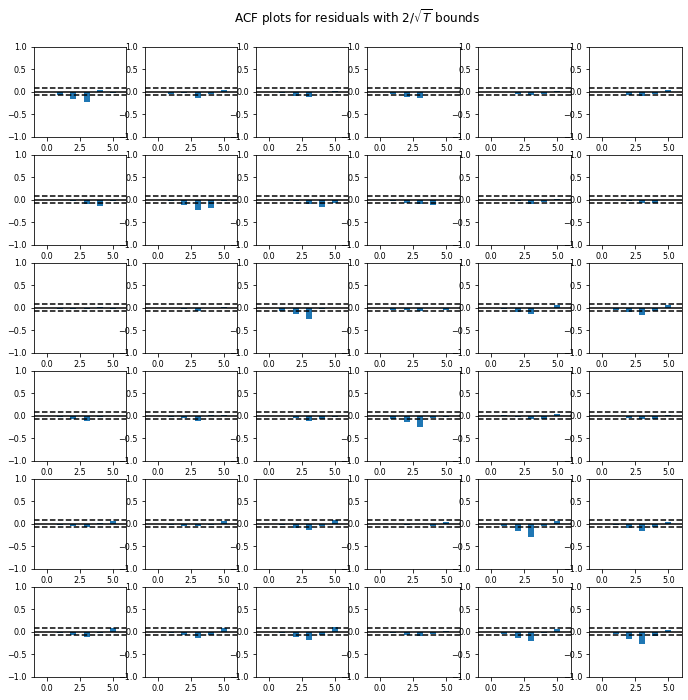

In [10]:
# 會致殘差像自相關圖，最大滯後係數=10
res.plot_acorr(nlags=5, resid=True, linewidth=6)
plt.show()

In [11]:
from statsmodels.tsa.stattools import acf
# 調用acf函數獲得Q檢驗結果
(resid_acf, qstat, pvalue) = acf(res.resid['300750.SZ'], nlags=10, qstat=True)
# 輸出Q檢驗結果
print(qstat)

[ 4.3162779  23.15920403 61.34854564 62.41247429 63.15353382 67.70469829
 69.32654854 71.59521219 72.19357154 75.74712805]


C:\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [12]:
# Granger因果關係檢驗
# 使用Wald(chi-sq)檢驗來判斷方程式右側變量與USDCNY的Granger因果
variables = data.columns.tolist()
var_pop = variables
var_pop.pop(0)
print(res.test_causality(variables[0],
                         var_pop,
                         kind='wald').summary())

Granger causality Wald-test. H_0: ['002812.SZ', '300115.SZ', '002850.SZ', '002463.SZ', '002384.SZ'] do not Granger-cause 002812.SZ. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
         132.4          18.31   0.000 10
----------------------------------------
